In [192]:
# The guide for the practice is taken from https://github.com/weijie-chen/Time-Series-and-Financial-Engineering-With-Python
#https://github.com/weijie-chen/Time-Series-and-Financial-Engineering-With-Python/blob/main/notebooks/time_series_analysis/Chapter%201%20-%20Time%20Series%20Manipulation.ipynb

import pandas as pd 
import numpy 
import yfinance as yf
import matplotlib.pyplot as plt 


[*********************100%***********************]  1 of 1 completed


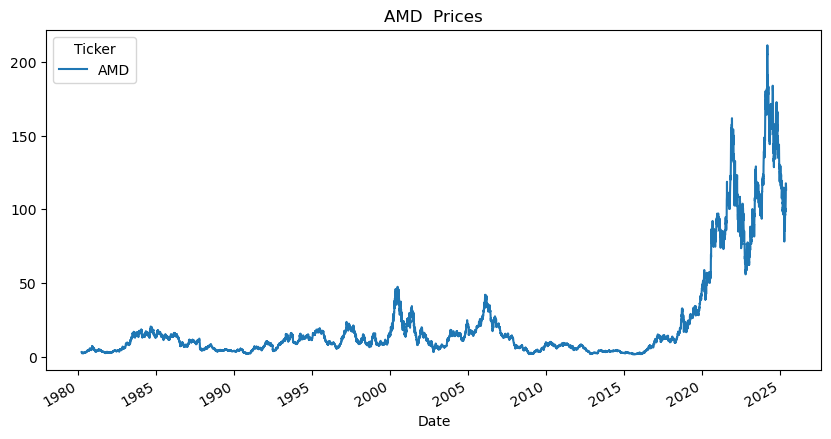

In [193]:
"""Weekday distributions for stocks"""
Data = input("Enter the stock ticker symbol (e.g., AAPL, MSFT): ")
Prices = yf.download(Data)
Prices.isnull().sum()
Prices["Close"].plot(title= Data + ' Prices', figsize=(10, 5))
plt.show()

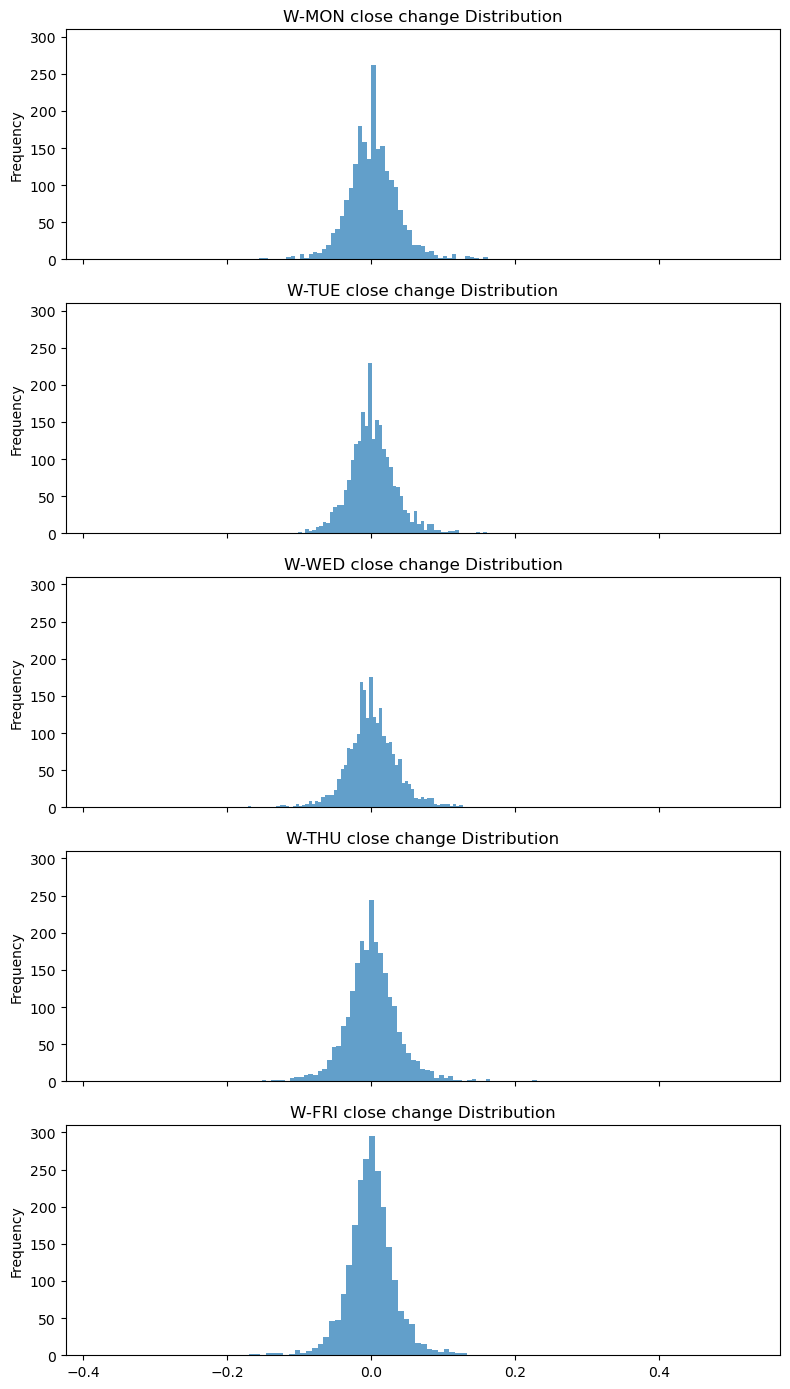

                 Mean  Standard Deviation
W-MON close  0.001690            0.037101
W-TUE close  0.001361            0.035326
W-WED close  0.001249            0.036871
W-THU close  0.001246            0.040456
W-FRI close -0.000481            0.036284
{'STD': Ticker
AMD    0.037244
dtype: float64, 'MEAN': Ticker
AMD    0.001009
dtype: float64}


In [194]:
import pandas as pd
import matplotlib.pyplot as plt

Prices = (Prices / Prices.shift()) - 1

weekday_returns = {}
for day in ["W-MON", "W-TUE", "W-WED", "W-THU", "W-FRI"]:
    Priceday = Prices['Close'].asfreq(day)
    weekday_returns[day + " close"] = Priceday.dropna()

weekprices = pd.concat(weekday_returns.values(), axis=1)
weekprices.columns = list(weekday_returns.keys())

# Create subplots with shared axes
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 14), sharex=True, sharey=True)

for ax, (col, data) in zip(axes, weekprices.items()):
    data.plot.hist(ax=ax, bins=100, alpha=0.7)
    ax.set_title(f"{col} change Distribution")

plt.tight_layout()
plt.show()
# Calculate stats
weekprices_stats = pd.DataFrame({
'Mean': weekprices.mean(),
'Standard Deviation': weekprices.std()
})

STD = Prices["Close"].std()
MEAN = Prices["Close"].mean()
print(weekprices_stats)
print({"STD" : STD, "MEAN" : MEAN})